# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)





## Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 


In [3]:
data=pd.read_csv('dataset_part_1.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [9]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Directly read CSV from URL
X = pd.read_csv(URL2)



In [10]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [12]:
# Check the columns in the dataframe
print(data.columns)

# Extract the 'Class' column as a Pandas Series and convert it to NumPy array
# Assuming 'Outcome' is the column we need
Y = data['Outcome'].to_numpy()

# Check the output
print(type(Y))  # Should show: <class 'numpy.ndarray'>
print(Y[:5])    # Print first 5 elements


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')
<class 'numpy.ndarray'>
['None None' 'None None' 'None None' 'False Ocean' 'None None']


In [14]:
# Initialize the scaler
transform = preprocessing.StandardScaler()

# Fit the scaler and transform X
X = transform.fit_transform(X)

# Check the transformed X
print(X.shape)  # First 5 rows of scaled features

(90, 83)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (72, 83)
Shape of X_test: (18, 83)
Shape of Y_train: (72,)
Shape of Y_test: (18,)


In [16]:
# Define the parameter grid
parameters = {"C": [0.01, 0.1, 1],
              "penalty": ['l2'],
              "solver": ['lbfgs']}

# Create Logistic Regression object
lr = LogisticRegression()

# Create GridSearchCV object
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV on training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Best parameters:", logreg_cv.best_params_)
print("Best cross-validation score (accuracy):", logreg_cv.best_score_)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score (accuracy): 0.75


In [18]:
# Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7778


In [19]:
# Predict using the test set
yhat = logreg_cv.predict(X_test)

def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)  # fmt='g' to avoid scientific notation
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    
    # Dynamically set labels based on unique classes
    labels = sorted(np.unique(y))  # Get unique class labels
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    
    plt.show()



In [20]:
# Define parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create SVM object
svm = SVC()

# Create GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model on training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Tuned hyperparameters (best parameters): {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy: 0.7392857142857143


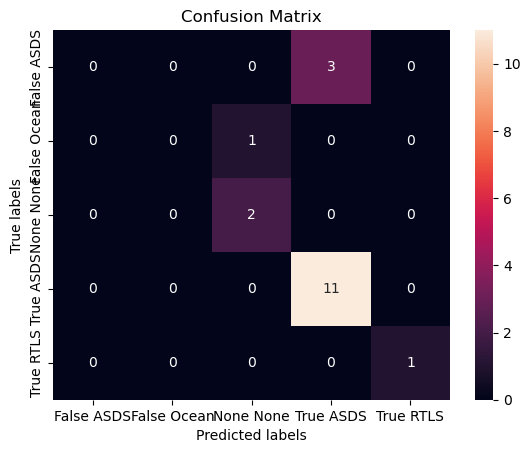

Test set accuracy: 0.7777777777777778


In [21]:
# Predict on test data
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

# Calculate accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)


In [22]:
# Define parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create decision tree classifier object
tree = DecisionTreeClassifier()

# Create GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model
tree_cv.fit(X_train, Y_train)

# Output best parameters and best score
print("Tuned hyperparameters :(best parameters):", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Tuned hyperparameters :(best parameters): {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy : 0.7517857142857143


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\User\anaconda3\Lib\site-packages

Test Accuracy: 0.6111111111111112


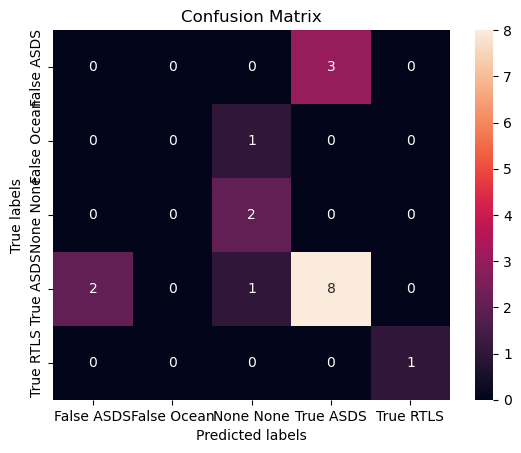

In [24]:
# Predict using the test set
yhat = tree_cv.predict(X_test)

# Calculate accuracy on test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)


In [25]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (best parameters):", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 446, in score
    return super().score(X, y, s

Tuned Hyperparameters (best parameters): {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
Best accuracy: 0.7357142857142857


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.54107143        nan 0.59821429        nan 0.62678571
        nan 0.65178571        nan 0.6125            nan 0.61071429
        nan 0.51428571        nan 0.5               nan 0.4875
        nan 0.47321429 0.65357143 0.54107143 0.6125     0.59821429
 0.73571429 0.62678571 0.73571429 0.65178571 0.72142857 0.6125
 0.72142857 0.61071429 0.73571429 0.51428571 0.73571429 0.5
 0.73571429 0.4875     0.73571429 0.47321429 0.65357143 0.54107143
 0.6125     0.59821429 0.73571429 0.62678571 0.73571429 0.65178571
 0.72142857 0.6125     0.72142857 0.61071429 0.73571429 0.51428571
 0.73571429 0.5        0.73571429 0.4875     0.73571429 0.47321429
        nan 0.54107143        nan 0.59821429        nan 0.62678571
        nan 0.65178571        nan 0.6125            nan 0.61071429
        nan 0.51428571        nan 0.5               nan 0.4875
     

Test set accuracy: 0.7777777777777778


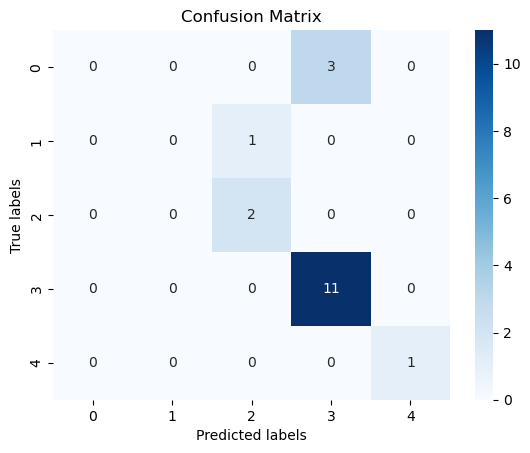

In [26]:
# Predict on the test data
yhat = knn_cv.predict(X_test)

# Calculate and print the accuracy
accuracy = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, yhat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



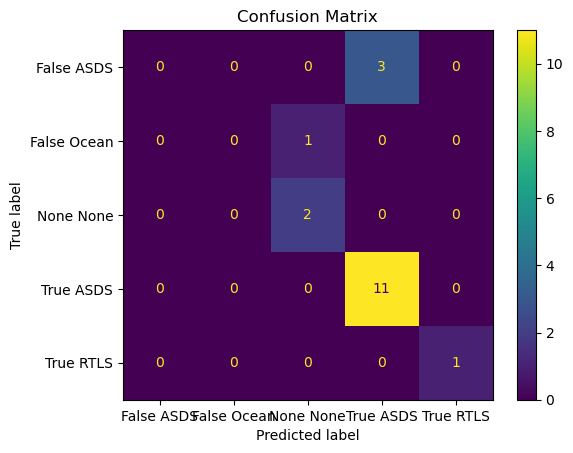

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
yhat = knn_cv.predict(X_test)

# Plot confusion matrix without manually setting display_labels
ConfusionMatrixDisplay.from_predictions(Y_test, yhat, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


Accuracy on test data: 0.7778


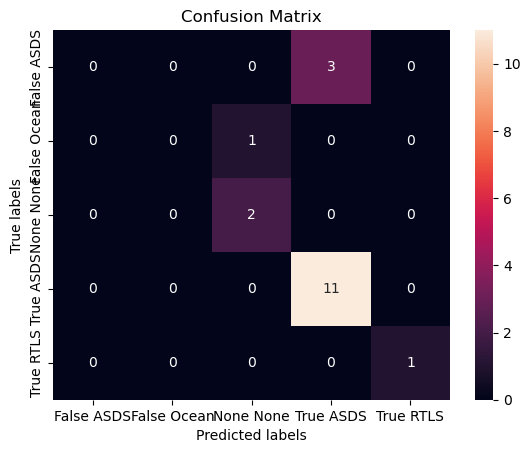

In [30]:
# 1️⃣ Calculate accuracy using the score method
accuracy = knn_cv.score(X_test, Y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

# 2️⃣ Generate predictions
yhat = knn_cv.predict(X_test)

# 3️⃣ Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)



In [31]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

print("Logistic Regression Test Accuracy: ", logreg_accuracy)
print("SVM Test Accuracy: ", svm_accuracy)
print("Decision Tree Test Accuracy: ", tree_accuracy)
print("KNN Test Accuracy: ", knn_accuracy)


Logistic Regression Test Accuracy:  0.7777777777777778
SVM Test Accuracy:  0.7777777777777778
Decision Tree Test Accuracy:  0.6111111111111112
KNN Test Accuracy:  0.7777777777777778
